In [1]:
import os
import ants
import nrrd

import sys
import collections
import numpy as np
import pandas as pd
import nibabel as nib
import operator as op

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
def trim_axs(axes, n):
    axs = axes.flat
    for ax in axs[n:]:
        ax.remove()
    return axs[:n]

## Allen Coordinate System

Here is an image embedded from their website:

![Allen Coordinate Space](http://help.brain-map.org/download/attachments/5308472/3DOrientation.png?version=1&modificationDate=1368132564812&api=v2 "Allen Coordinate Space")

## Allen SDK

In [3]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# tell the cache class what resolution (in microns) of data you want to download
mcc = MouseConnectivityCache(resolution=100)

# use the structure tree class to get information about the isocortex structure
structure_tree = mcc.get_structure_tree()
isocortex_id = structure_tree.get_structures_by_name(['Isocortex'])[0]['id']

# a list of dictionaries containing metadata for non-Cre experiments
experiments = mcc.get_experiments(file_name='non_cre.json',
                                  injection_structure_ids=[isocortex_id])

# download the projection density volume for one of the experiments
pd, pd_meta = mcc.get_projection_density(experiments[0]['id'])

In [4]:
structure_tree.get_structures_by_name(['Isocortex'])

[{'acronym': 'Isocortex',
  'graph_id': 1,
  'graph_order': 5,
  'id': 315,
  'name': 'Isocortex',
  'structure_id_path': [997, 8, 567, 688, 695, 315],
  'structure_set_ids': [2,
   112905828,
   691663206,
   12,
   184527634,
   112905813,
   687527670,
   114512891,
   114512892],
  'rgb_triplet': [112, 255, 113]}]

### Plot example projection density

#### X

Each subplot:
- Vertical: **top -> bottom** corresponds to **Superior -> Inferior (+y)**
- Horizontal: **left -> right** corresponds to **Right -> Left (-z)**

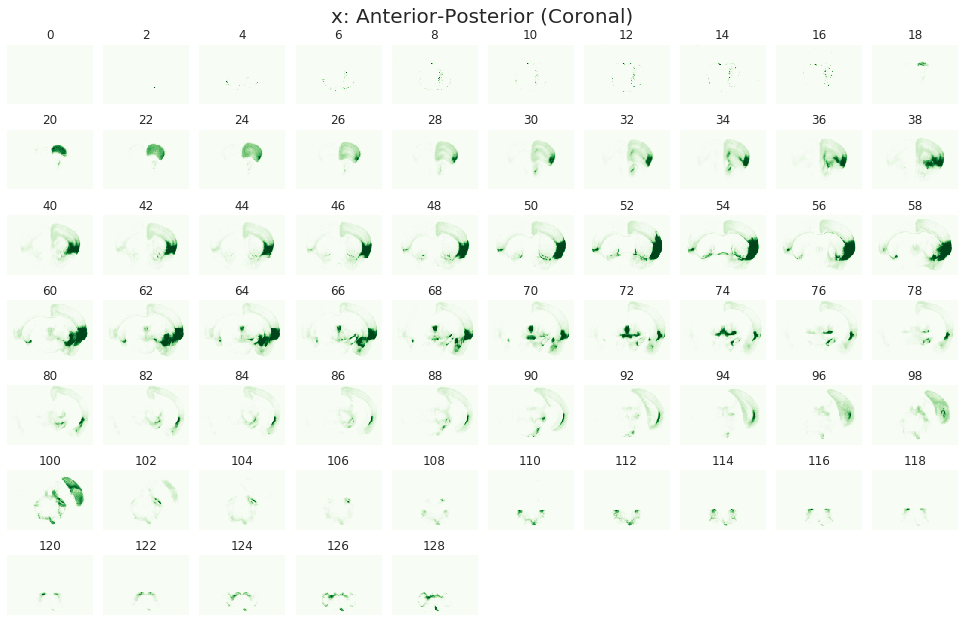

In [5]:
skip_frames = 2
dim = 0

ncols = 10
nrows = int(np.ceil(pd_meta['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8.5))

for ctr, idx in enumerate(range(0, pd_meta['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(pd.take(idx, axis=dim), cmap='Greens', interpolation='none')
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'x: Anterior-Posterior (Coronal)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

#### Y

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Left -> Right (+z)**

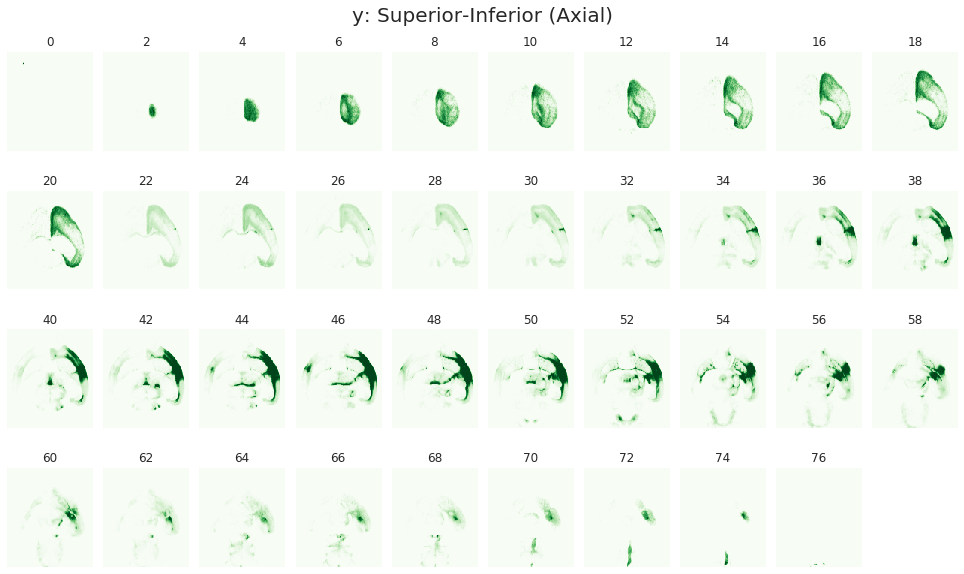

In [8]:
skip_frames = 2
dim = 1

ncols = 10
nrows = int(np.ceil(pd_meta['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8))

for ctr, idx in enumerate(range(0, pd_meta['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(pd.take(idx, axis=dim), cmap='Greens', interpolation='none')
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'y: Superior-Inferior (Axial)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

#### Z

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Superior -> Inferior (+y)**

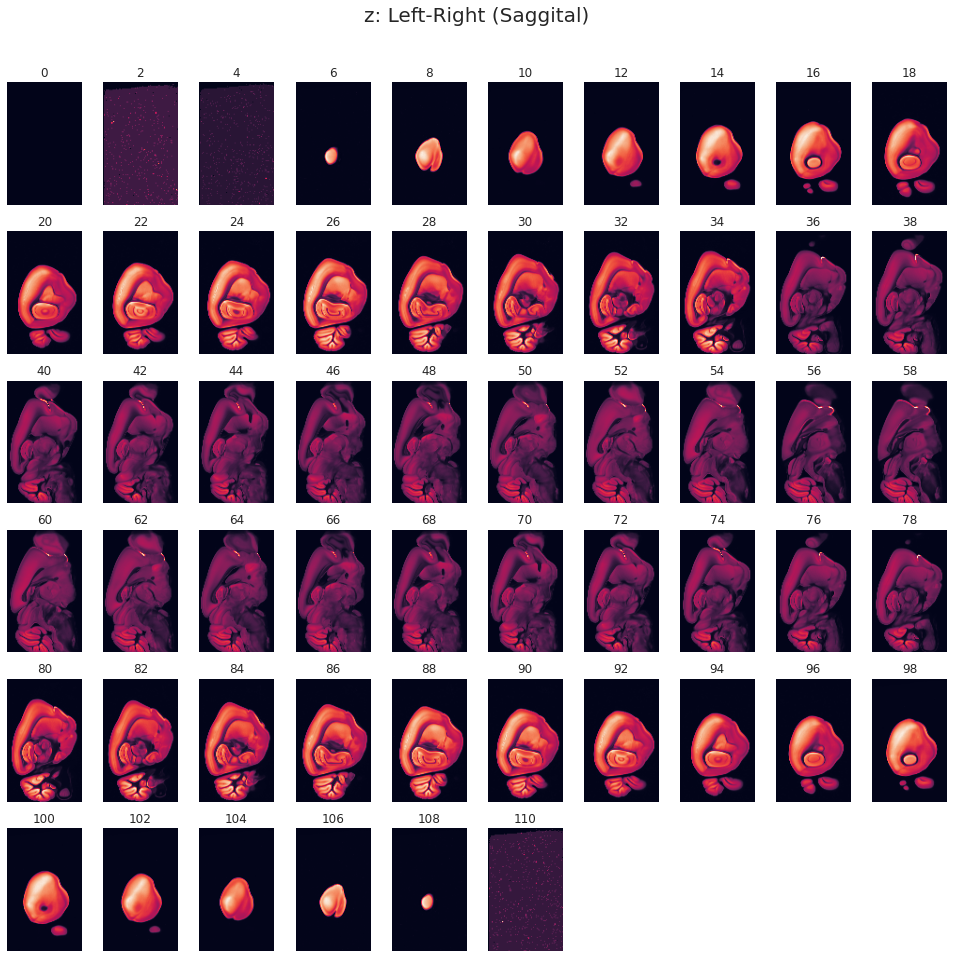

In [9]:
skip_frames = 2
dim = 2

ncols = 10
nrows = int(np.ceil(template_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 13))

for ctr, idx in enumerate(range(0, template_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(template.take(idx, axis=dim))
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'z: Left-Right (Saggital)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

## Template

In [2]:
template, template_header = nrrd.read('/home/hadi/Downloads/average_template_100.nrrd')

In [3]:
template.shape

(132, 80, 114)

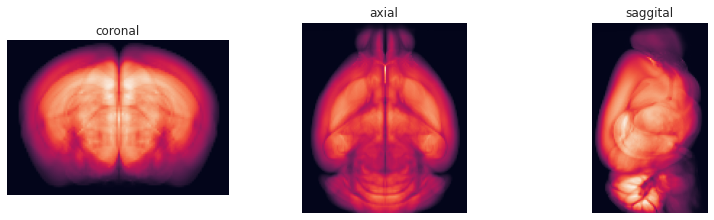

In [4]:
sns.set_style('white')

plt.figure(figsize=(13.5, 3.5))
plt.subplot(131)
plt.imshow(template.mean(0))
plt.title('coronal')
plt.axis('off')

plt.subplot(132)
plt.imshow(template.mean(1))
plt.title('axial')
plt.axis('off')

plt.subplot(133)
plt.imshow(template.mean(2))
plt.title('saggital')
plt.axis('off')

plt.show()

In [5]:
template_header

OrderedDict([('type', 'unsigned short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([132,  80, 114])),
             ('space directions',
              array([[100.,   0.,   0.],
                     [  0., 100.,   0.],
                     [  0.,   0., 100.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin', array([0., 0., 0.]))])

### X

Each subplot:
- Vertical: **top -> bottom** corresponds to **Superior -> Inferior (+y)**
- Horizontal: **left -> right** corresponds to **Right -> Left (-z)**

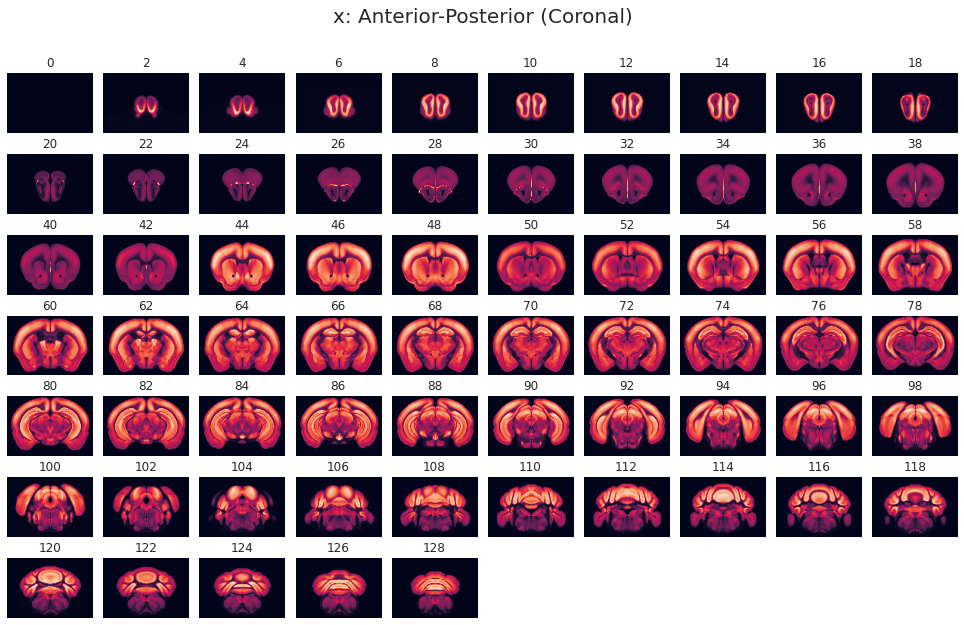

In [7]:
skip_frames = 2
dim = 0

ncols = 10
nrows = int(np.ceil(template_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8.5))

for ctr, idx in enumerate(range(0, template_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(template.take(idx, axis=dim))
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'x: Anterior-Posterior (Coronal)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

### Y

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Left -> Right (+z)**

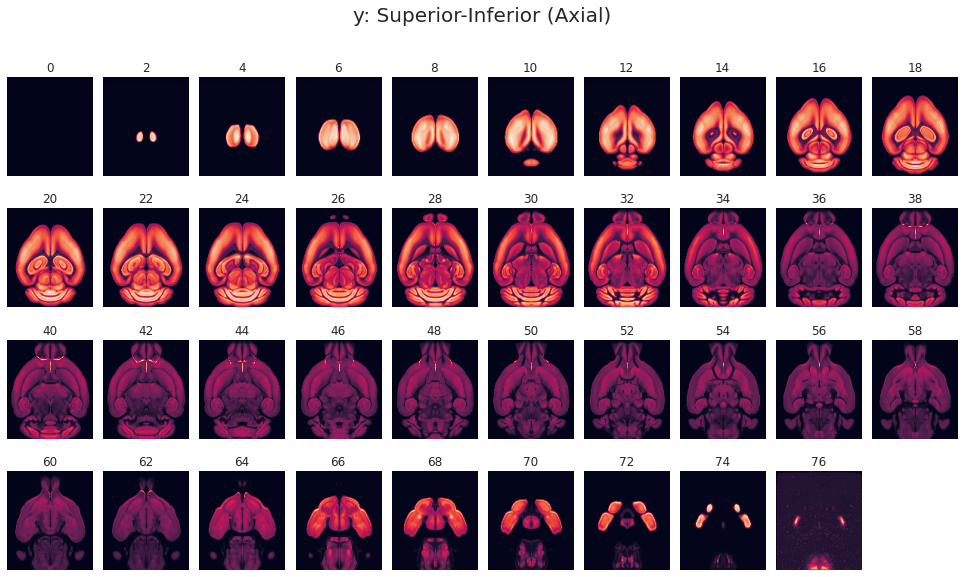

In [8]:
skip_frames = 2
dim = 1

ncols = 10
nrows = int(np.ceil(template_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8))

for ctr, idx in enumerate(range(0, template_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(template.take(idx, axis=dim))
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'y: Superior-Inferior (Axial)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

### Z

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Superior -> Inferior (+y)**

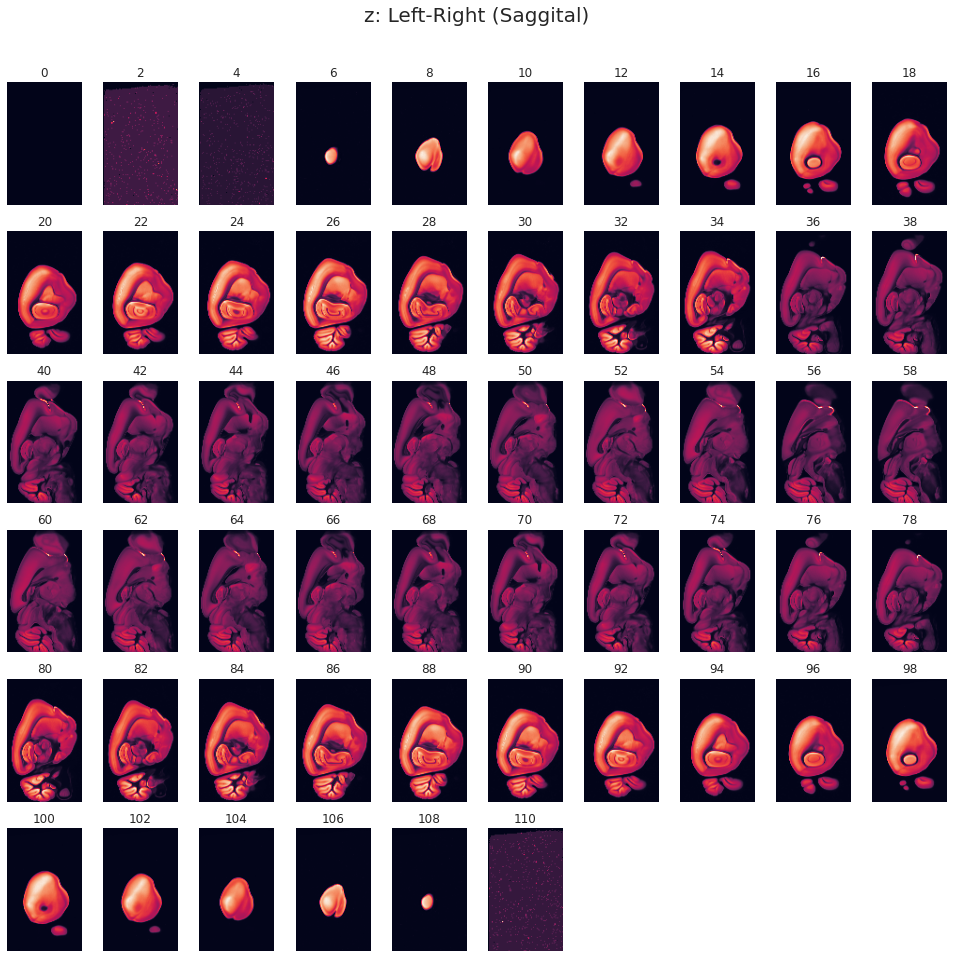

In [9]:
skip_frames = 2
dim = 2

ncols = 10
nrows = int(np.ceil(template_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 13))

for ctr, idx in enumerate(range(0, template_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(template.take(idx, axis=dim))
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'z: Left-Right (Saggital)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

## Annotation

In [10]:
anno, anno_header = nrrd.read('/home/hadi/Downloads/annotation_100.nrrd')

In [11]:
anno.shape

(132, 80, 114)

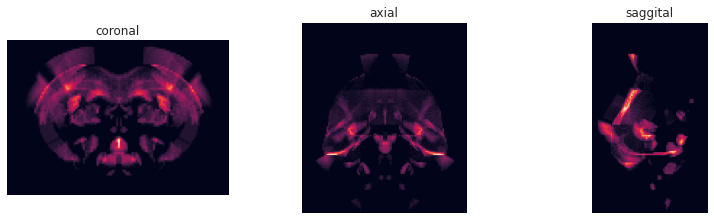

In [17]:
sns.set_style('white')

plt.figure(figsize=(13.5, 3.5))
plt.subplot(131)
plt.imshow(anno.mean(0))
plt.title('coronal')
plt.axis('off')

plt.subplot(132)
plt.imshow(anno.mean(1))
plt.title('axial')
plt.axis('off')

plt.subplot(133)
plt.imshow(anno.mean(2))
plt.title('saggital')
plt.axis('off')

plt.show()

### X

Each subplot:
- Vertical: **top -> bottom** corresponds to **Superior -> Inferior (+y)**
- Horizontal: **left -> right** corresponds to **Right -> Left (-z)**

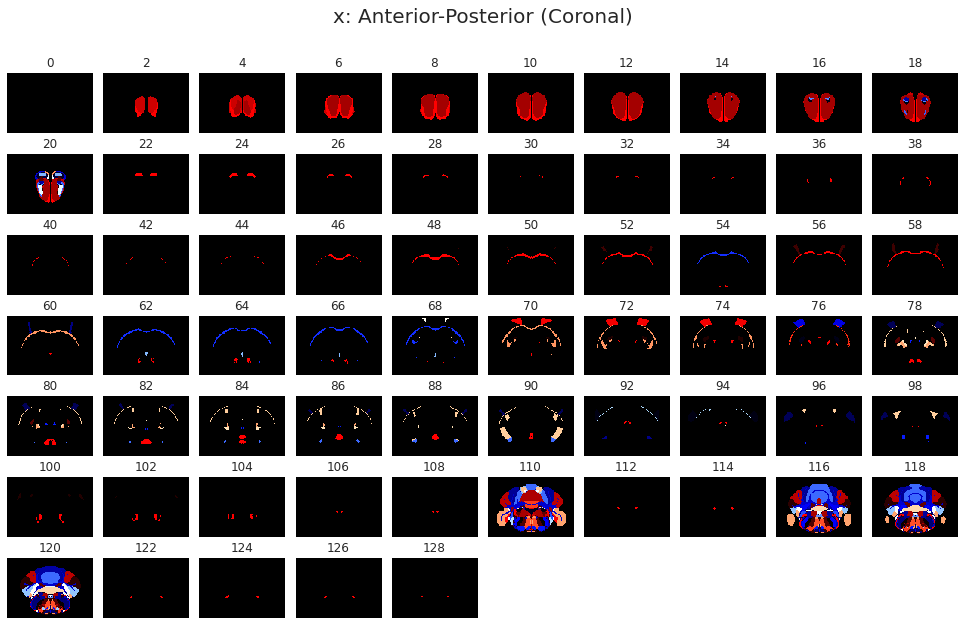

In [14]:
skip_frames = 2
dim = 0

ncols = 10
nrows = int(np.ceil(anno_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8.5))

for ctr, idx in enumerate(range(0, anno_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(anno.take(idx, axis=dim), cmap='flag_r', interpolation='none')
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'x: Anterior-Posterior (Coronal)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

### Y

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Left -> Right (+z)**

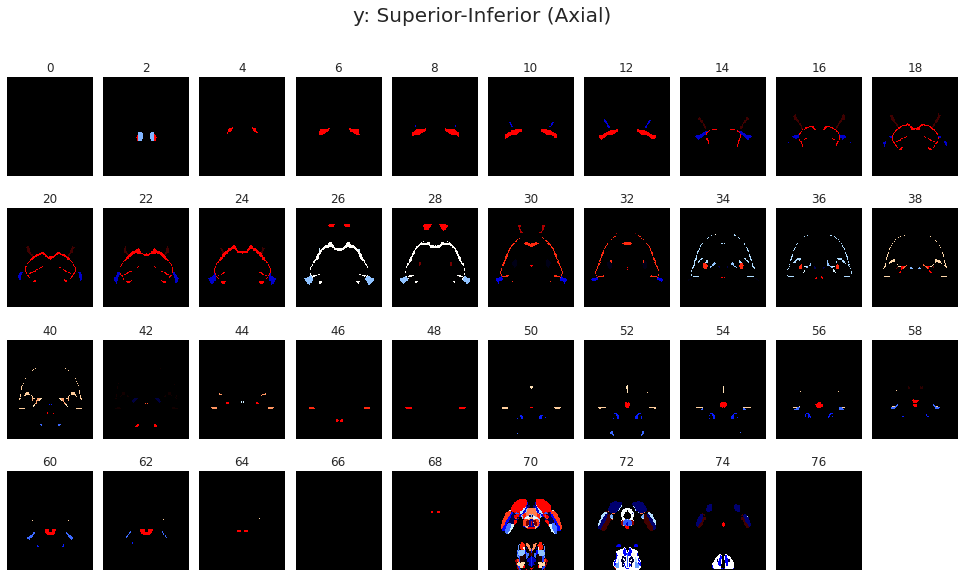

In [15]:
skip_frames = 2
dim = 1

ncols = 10
nrows = int(np.ceil(anno_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 8))

for ctr, idx in enumerate(range(0, anno_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(anno.take(idx, axis=dim), cmap='flag_r', interpolation='none')
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'y: Superior-Inferior (Axial)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

### Z

Each subplot:
- Vertical: **top -> bottom** corresponds to **Anterior -> Posterior (+x)**
- Horizontal: **left -> right** corresponds to **Superior -> Inferior (+y)**

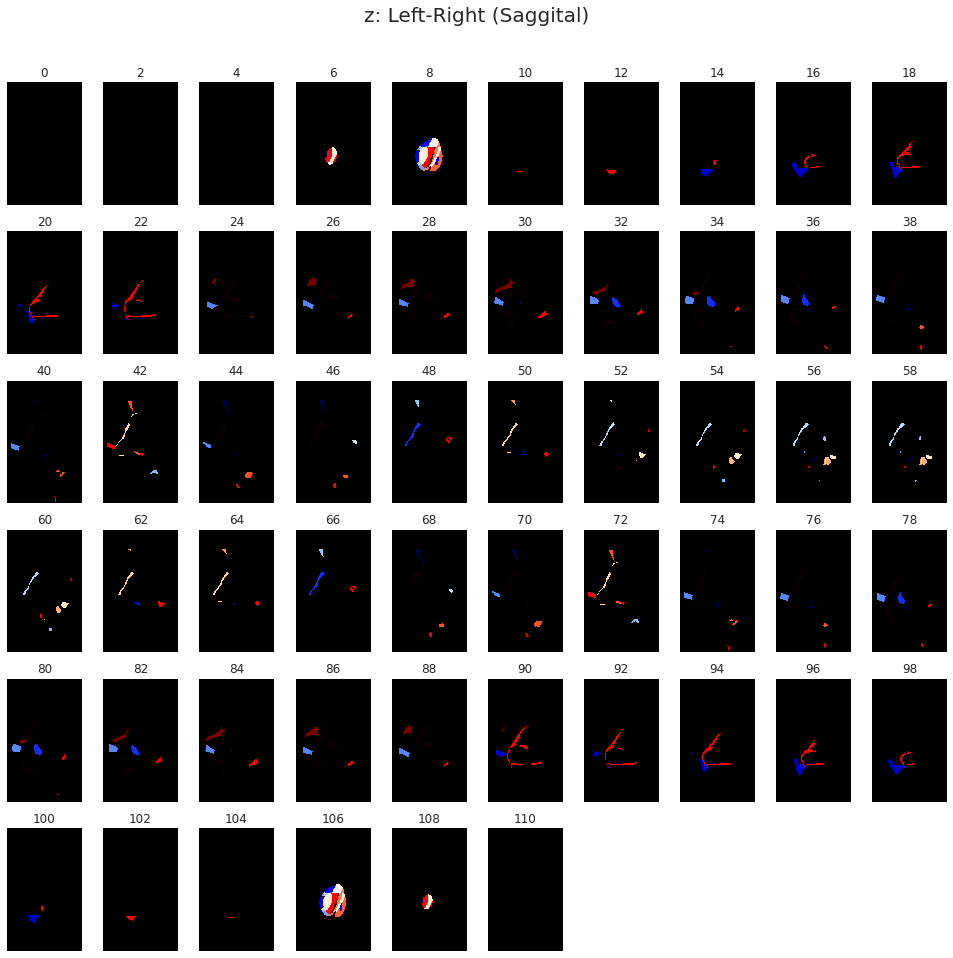

In [16]:
skip_frames = 2
dim = 2

ncols = 10
nrows = int(np.ceil(anno_header['sizes'][dim] / ncols / skip_frames))
fig, axes = plt.subplots(nrows, ncols, figsize=(13.5, 13))

for ctr, idx in enumerate(range(0, anno_header['sizes'][dim], skip_frames)):
    i, j = ctr//ncols, ctr%ncols
    axes[i, j].imshow(anno.take(idx, axis=dim), cmap='flag_r', interpolation='none')
    axes[i, j].set_title(idx)
    axes[i, j].axis('off')    
axes_flat = trim_axs(axes, i*ncols+j)

msg = 'z: Left-Right (Saggital)'
fig.suptitle(msg, fontsize=20, y=1.02)
fig.tight_layout()
plt.show()

## Structure centers

In [19]:
struct = pd.read_csv('/home/hadi/Downloads/structure_centers.csv')
struct

,structure_id,x,y,z,reference_space_id
0,1084,9330,3600,2940,10
1,877,10590,5610,5450,10
2,574,9340,6080,5180,10
3,667,2090,2740,4530,10
4,143,12140,6690,4370,10
...,...,...,...,...,...
1675,74,9010,2100,9080,9
1676,752,10850,5120,8010,9
1677,608,3160,3400,6710,9
1678,956,5000,4150,9010,9


## Allen SDK

In [2]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# tell the cache class what resolution (in microns) of data you want to download
mcc = MouseConnectivityCache(resolution=100)

# use the structure tree class to get information about the isocortex structure
structure_tree = mcc.get_structure_tree()
isocortex_id = structure_tree.get_structures_by_name(['Isocortex'])[0]['id']

# a list of dictionaries containing metadata for non-Cre experiments
experiments = mcc.get_experiments(file_name='non_cre.json',
                                  injection_structure_ids=[isocortex_id])

# download the projection density volume for one of the experiments
pd = mcc.get_projection_density(experiments[0]['id'])

ModuleNotFoundError: No module named 'allensdk'